# Programming Exercise 2: Logistic Regression

In [2]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from logisticRegression import *

# Optimization module in scipy
from scipy import optimize

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [3]:
# header=None as the imported data has no header. Otherwise Pandas considers the first row of data as the header
data = pd.read_csv('ex2data1.txt', header=None)

# data.describe - with no () gives results in a different format
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
# Convert the data into a numpy array
X = data.iloc[:,:-1].to_numpy()

# I am not totally sure why I have to put the [] on [-1]. On this way I have a list of vectors also on y
y = data.iloc[:,[-1]].to_numpy()

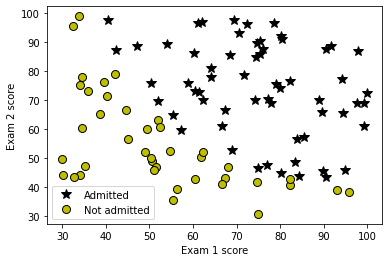

In [5]:
# Plotting the data
adm  = X[y.flatten() == 1]
nadm = X[y.flatten() == 0]
plt.plot(adm[:, 0], adm[:, 1], 'k*', lw=2, ms=10)
plt.plot(nadm[:, 0], nadm[:, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])

## Implement the sigmoid function

In [6]:
sigmoid(np.array([[4, 5, 6]]))

array([[0.98201379, 0.99330715, 0.99752738]])

## Cost Function and Gradient descent

In [7]:
# m = number of training examples
# n = number of features
(m,n) = X.shape

# Add a ones column to X
X = np.append(np.ones((m, 1)), X, axis=1)

# Initializa theta as 0s
initial_theta = np.zeros((n+1, 1))

In [8]:
cost, grad = costFunction(initial_theta, X, y)

print('When theta=[0, 0, 0] the computeCost value is %.3f' %cost)
print('Expected cost value (approx) 0.693\n')

When theta=[0, 0, 0] the computeCost value is 0.693
Expected cost value (approx) 0.693



In [9]:
print('Gradient at initial theta (zeros):')
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
print('\t',grad.flatten())
print('\nExpected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

Gradient at initial theta (zeros):
	 [-0.1000 -12.0092 -11.2628]

Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]



In [10]:
cost, grad = costFunction(np.array([[-24, 0.2, 0.2]]).T, X, y)

print('When theta= [-24, 0.2, 0.2] the computeCost value is %.3f' %cost)
print('Expected cost value (approx) 0.218\n')

When theta= [-24, 0.2, 0.2] the computeCost value is 0.218
Expected cost value (approx) 0.218



In [11]:
print('Gradient at initial theta (zeros):')
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print('\t',grad.flatten())
print('\nExpected gradients (approx):\n\t[0.043, 2.566, 2.647]\n')

Gradient at initial theta (zeros):
	 [ 0.043  2.566  2.647]

Expected gradients (approx):
	[0.043, 2.566, 2.647]



## Learning parameters using <code>scipy.optimize</code>

Andrew NG's course uses a MATLAB/Octave built-in function called <code>fminunc</code>.
Octave/MATLAB's fminunc is an optimization solver that finds the minimum of an unconstrained function. For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters.
Concretely, you are going to use fminunc to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of $X$ and y values).

In this case, using Python, we'll use the <code>scipy.optimize</code> module. SciPy is a numerical computing library for python. It provides an optimization module for root finding and minimization. As of scipy 1.0, the function <code>scipy.optimize.minimize</code> is the method to use for optimization problems(both constrained and unconstrained - constraints refer to constraints for the parameters. For example limiting that <code>theta</code> can only be <1).

For logistic regression, you want to optimize the cost function with parameters . Concretely, you are going to use <code>optimize.minimize</code> to find the best parameters

for the logistic regression cost function, given a fixed dataset (of $X$ and y values). You will pass to <code>optimize.minimize</code> the following inputs:
* <code>costFunction</code>: A cost function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to for the dataset (X, y). It is important to note that we only pass the name of the function without the parenthesis. This indicates that we are only providing a reference to this function, and not evaluating the result from this function.
* <code>initial_theta</code>: The initial values of the parameters we are trying to optimize.
* <code>(X, y)</code>: These are additional arguments to the cost function.
* <code>jac</code>: Indication if the cost function returns the Jacobian (gradient) along with cost value. (True)
* <code>method</code>: Optimization method/algorithm to use
* <code>options</code>: Additional options which might be specific to the specific optimization method. In the following, we only tell the algorithm the maximum number of iterations before it terminates.

If you have completed the costFunction correctly, <code>optimize.minimize</code> will converge on the right optimization parameters and return the final values of the cost and $\theta$ in a class object. Notice that by using optimize.minimize, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by <code>optimize.minimize</code>: you only needed to provide a function calculating the cost and the gradient.

> More information about <code>scipy.optimize</code> here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In this case we will use the TNC algoritm, using only the <code>maxiter</code> option. More info here: https://docs.scipy.org/doc/scipy/reference/optimize.minimize-tnc.html#optimize-minimize-tnc

In [12]:
# set options for optimize.minimize
options= {'maxiter': 400}

# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta.flatten(),
                        (X, y.flatten()),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')



Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


> This part of the exercise required me to play a lot with the way the data was passed to the <code>optimize.minimize</code> function. Note the <code>flatten()</code>. Unfortunately <code>optimize.minimize</code> does not work well with column or row vectors. It expects the parameters to be in an array format. <code>flatten()</code> reduces a column or vector row into an array.

> Note that we should not set a learning rate. This is all done with the TNC function. We only had to provide the cost function and the gradient.

> Thanks to https://medium.com/analytics-vidhya/python-implementation-of-andrew-ngs-machine-learning-course-part-2-1-1a666f049ad6 to help me on this.

## Evaluating logistic regression

### Plot decision boundary

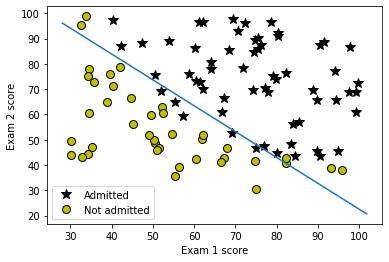

In [17]:
# Plotting the data
adm  = X[y.flatten() == 1]
nadm = X[y.flatten() == 0]
plt.plot(adm[:, 1], adm[:, 2], 'k*', lw=2, ms=10)
plt.plot(nadm[:, 1], nadm[:, 2], 'ko', mfc='y', ms=8, mec='k', mew=1)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])

# plot_x shows the data points in the x axis
plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
# Calculate the decision boundary line. This is the line when sigmoid(x)=0.5.
# Sigmoid is 0.5 when x=0 (e.power(0)=1). Therefore it is the case when x.dot.theta=0 and thus the following equation
plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
# Plot, and adjust axes for better viewing
plt.plot(plot_x, plot_y)

### Prediction

In [10]:
print('Admission predicted for a student with an Exam 1 score of 45 and an Exam 2 score of 85:', sigmoid(np.dot([1, 45, 85],theta.T)))

print('\nExpected value: 0.775 +/- 0.002\n\n')

Admission predicted for a student with an Exam 1 score of 45 and an Exam 2 score of 85: 0.7762906224352402

Expected value: 0.775 +/- 0.002




### Prediction's accuracy

In [15]:
p=predict(theta, X)

In [18]:
accuracy = np.mean (p == y.flatten())

In [19]:
print('Train accuracy:', accuracy*100)

print('\nExpected accuracy (approx): 89.0\n\n\n')

Train accuracy: 89.0

Expected accuracy (approx): 89.0



